In [12]:
# Step 1: Import Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# For cleaner plots
sns.set(style="darkgrid")


In [14]:
# Step 2: Load train.csv
df = pd.read_csv("train.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Check data types and missing values
df.info()

# Summary statistics
df.describe()

# Count unique values
df.nunique()

# Value counts for categorical variables
print("Sex:\n", df["Sex"].value_counts())
print("\nEmbarked:\n", df["Embarked"].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Embarked:
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


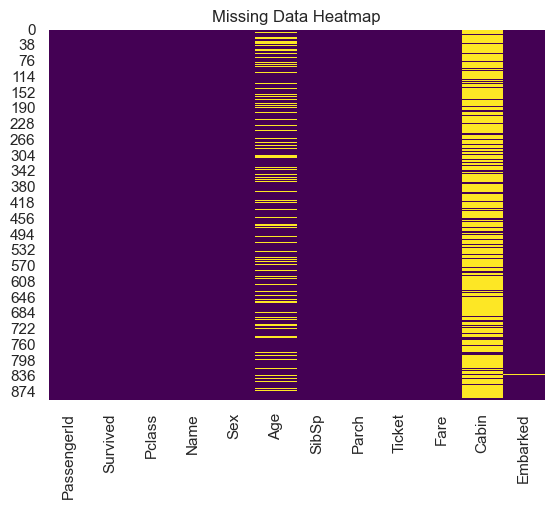

In [18]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()


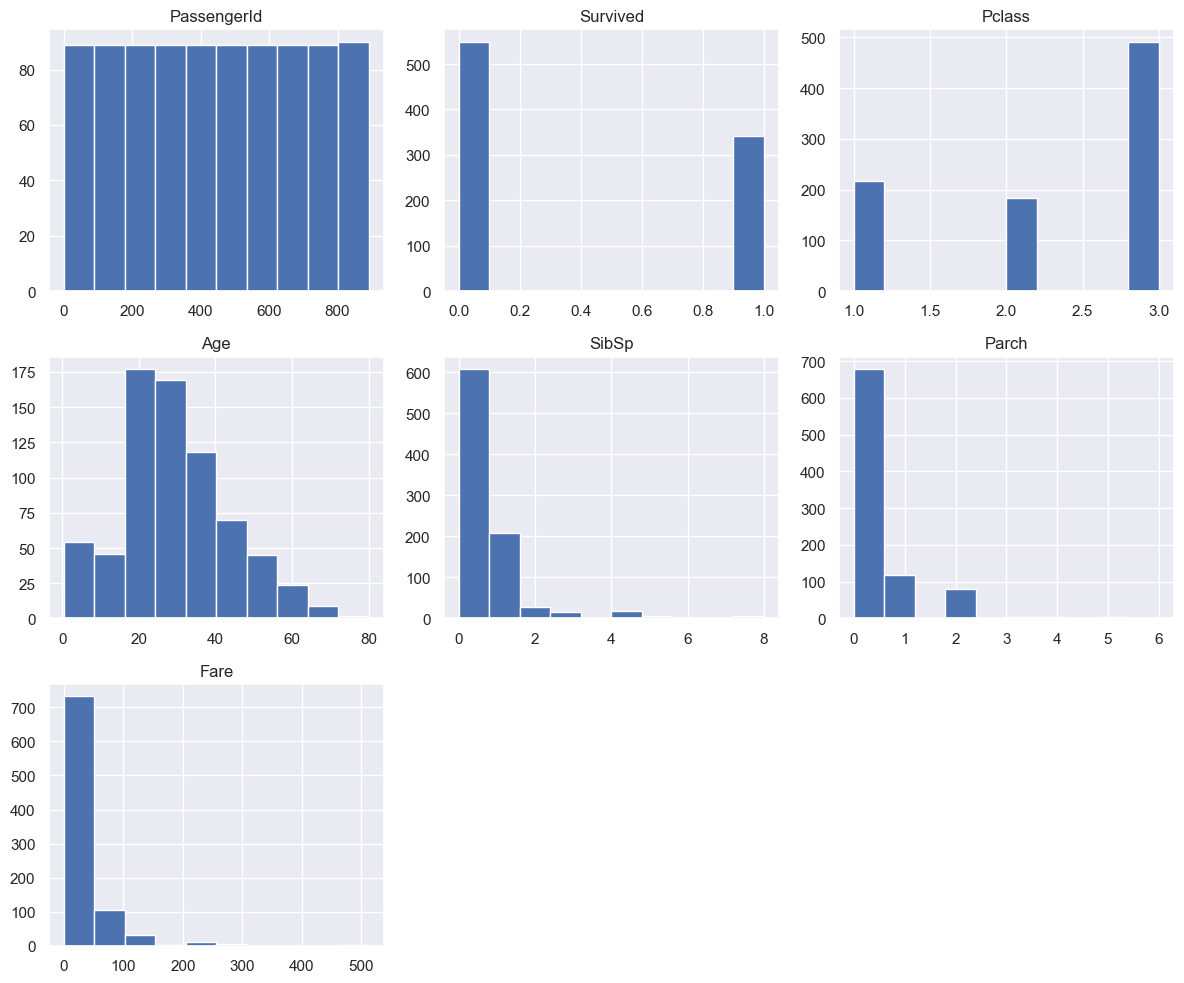

In [20]:
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


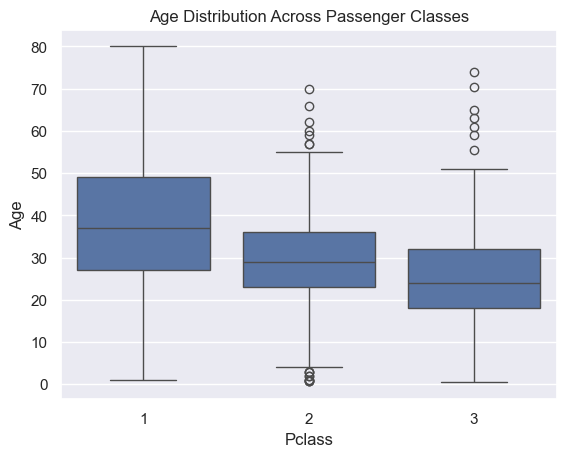

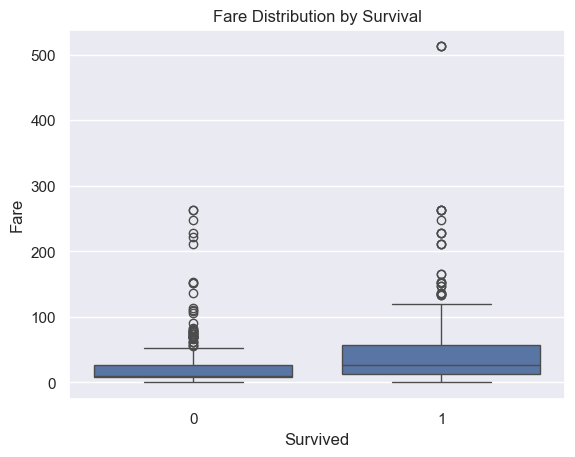

In [22]:
# Age distribution by class
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title("Age Distribution Across Passenger Classes")
plt.show()

# Fare by survival
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare Distribution by Survival")
plt.show()


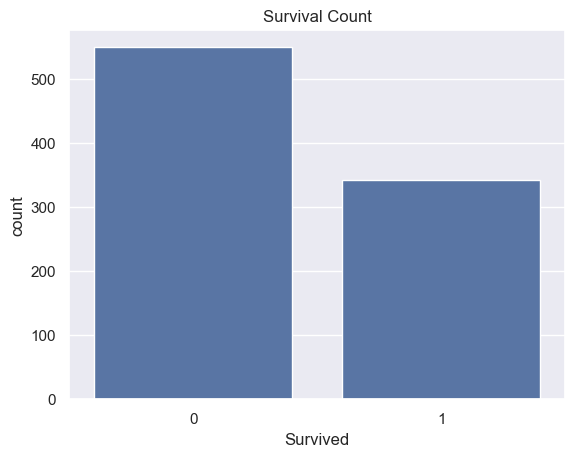

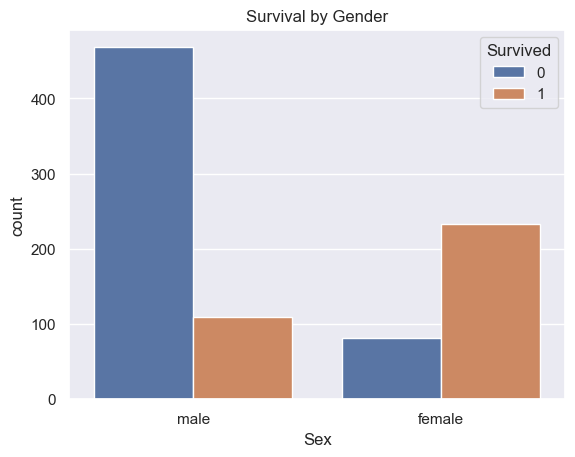

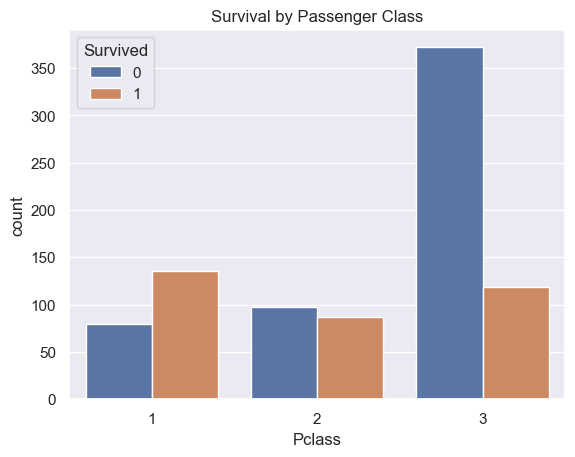

In [24]:
# Survival count
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.show()

# Survival by Sex
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival by Gender")
plt.show()

# Survival by Class
sns.countplot(x="Pclass", hue="Survived", data=df)
plt.title("Survival by Passenger Class")
plt.show()


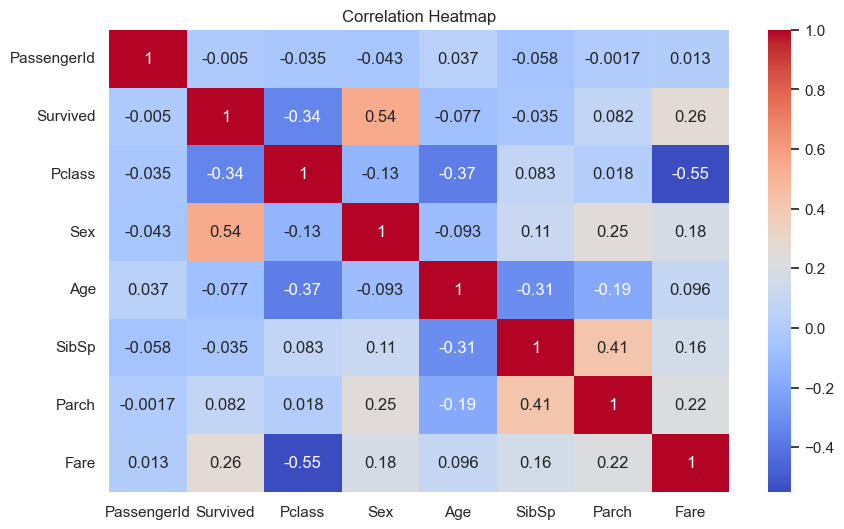

In [28]:
# Convert 'Sex' to numeric
df_numeric = df.copy()
df_numeric["Sex"] = df_numeric["Sex"].map({"male": 0, "female": 1})

# Keep only numeric columns
df_numeric = df_numeric.select_dtypes(include=["number"])

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


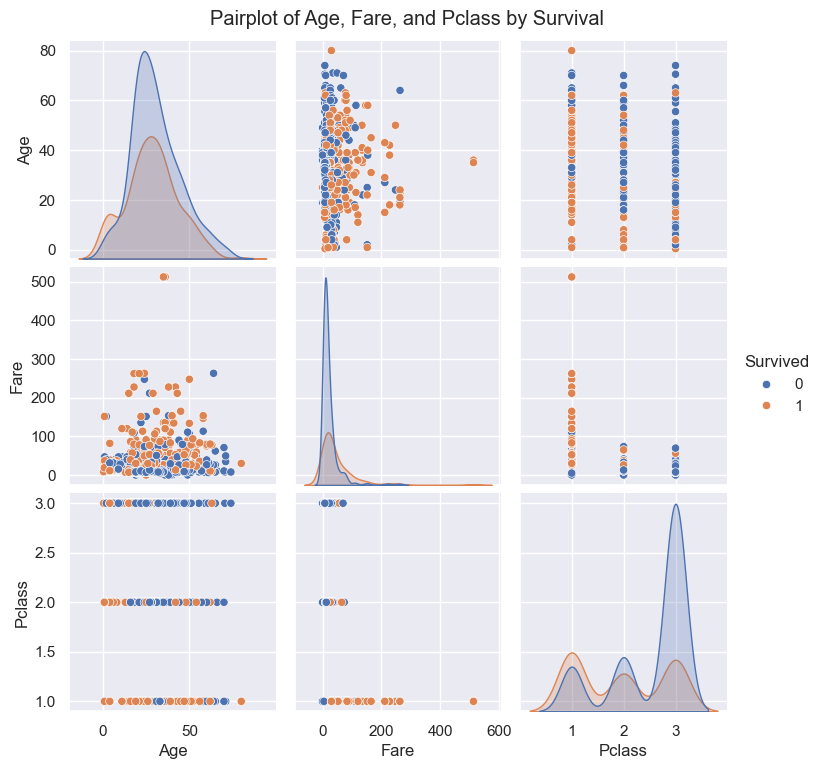

In [30]:
# Pairplot with selected features
sns.pairplot(df, vars=["Age", "Fare", "Pclass"], hue="Survived")
plt.suptitle("Pairplot of Age, Fare, and Pclass by Survival", y=1.02)
plt.show()
